In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5
         )

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4348,ham,�� bot notes oredi... Cos i juz rem i got...,NaN,NaN,NaN
4154,spam,Want a new Video Phone? 750 anytime any networ...,NaN,NaN,NaN
2563,ham,K..k..i'm also fine:)when will you complete th...,NaN,NaN,NaN
2629,ham,Hey there! Glad u r better now. I hear u treat...,NaN,NaN,NaN
1679,ham,"Today is \song dedicated day..\"" Which song wi...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# data cleaning
#2. EDA 
#3. text preprocessing
#4. model building
#5. evaluation
# 6 . improvement
#7. website
#8. deploy


## 1. DATA CLEANING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4526,ham,Understand. his loss is my gain :) so do you w...
2654,ham,Its sarcasm.. .nt scarcasim
2908,spam,URGENT! Your Mobile number has been awarded wi...
1509,ham,When u love someone Dont make them to love u a...
545,ham,Then any special there?


In [9]:
df.rename(columns ={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
4688,ham,"Didn't try, g and I decided not to head out"
3157,ham,Thank u. IT BETTER WORK OUT CAUSE I WILL FEEL ...
4251,ham,"Send ur birthdate with month and year, I will ..."
1200,ham,Otherwise had part time job na-tuition..
384,spam,Double mins and txts 4 6months FREE Bluetooth ...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# check for duplicate value
df.duplicated().sum()

403

In [15]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2.EDA

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

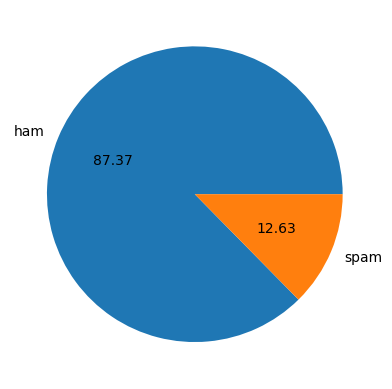

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels =['ham','spam'],autopct='%0.2f')
plt.show()

In [21]:
# data is inbalanced

In [22]:
import nltk


In [23]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [28]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will �_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [31]:
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#ham msg
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [36]:
import seaborn as sns



<Axes: xlabel='num_characters', ylabel='Count'>

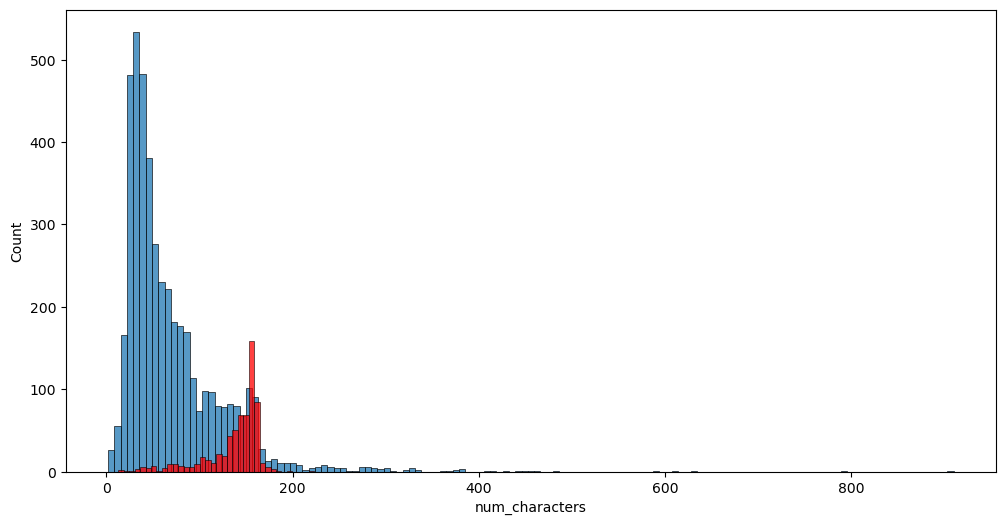

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')


<Axes: xlabel='num_words', ylabel='Count'>

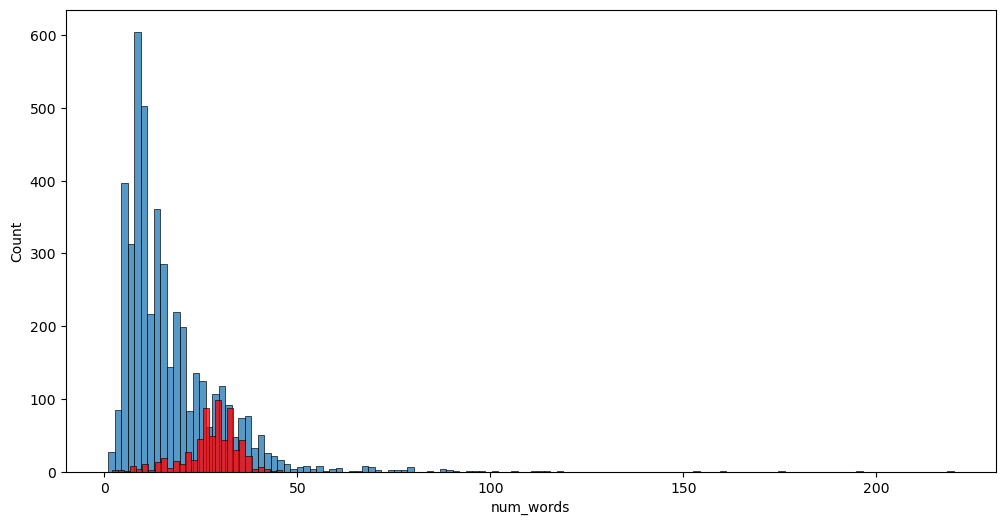

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')


<Axes: xlabel='num_sentence', ylabel='Count'>

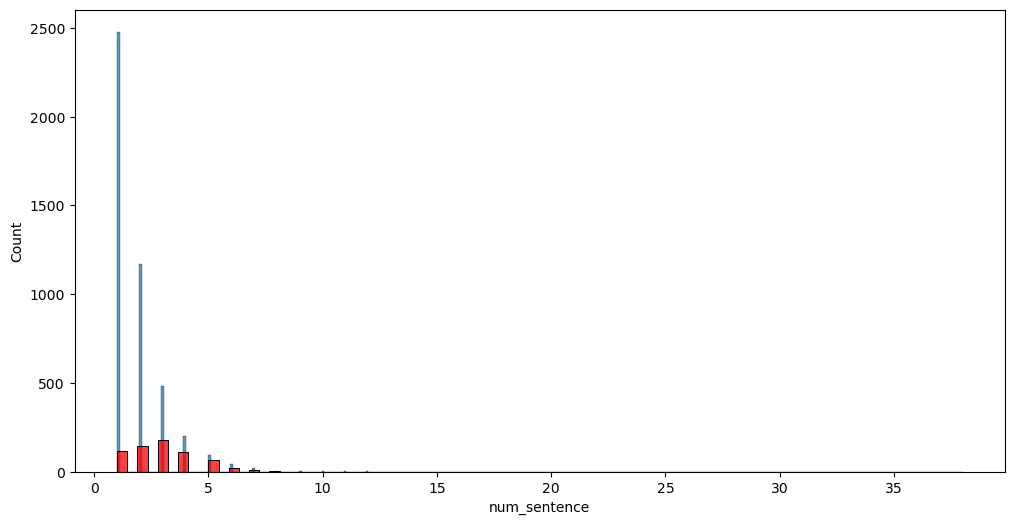

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentence'])
sns.histplot(df[df['target'] == 1]['num_sentence'], color='red')


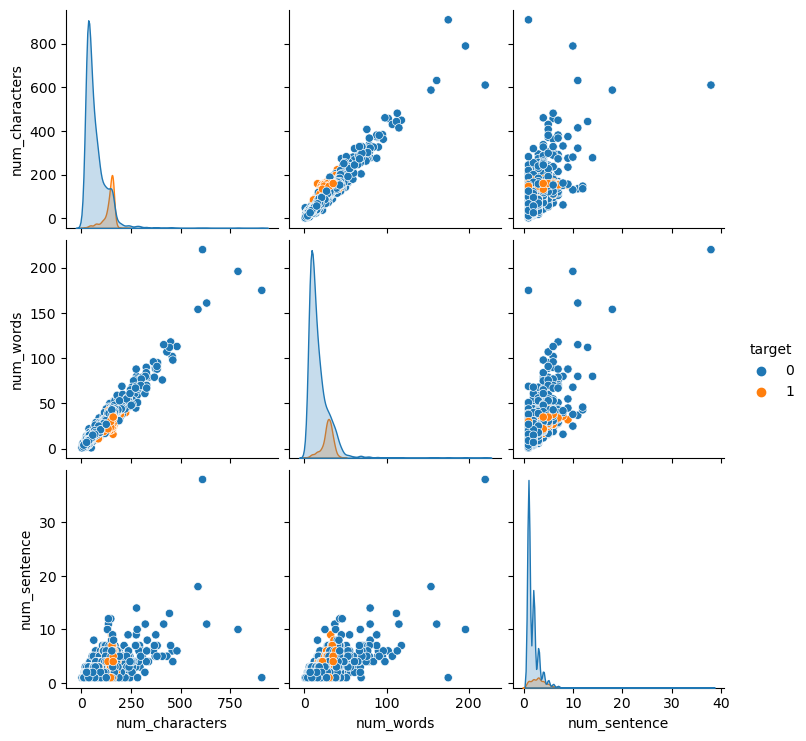

In [40]:
sns.pairplot(df,hue='target')

C:\Users\tanvi\AppData\Local\Temp\ipykernel_24664\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

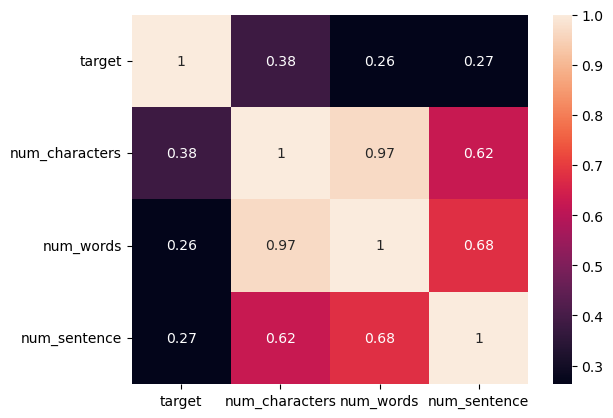

In [41]:
sns.heatmap(df.corr(), annot=True)

3. DATA PREPROCESSING
* LOWERCASE
* TOKENIZATION
* REMOVING SPECIAL CHARACTER
* REMOVING STOPWORDS AND PUNCTUATION
* STEMMING SIMILAR WORD CONVERT INTO SINGLE WORD

In [42]:
import nltk
from string import punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text :    # removing special character
        if i.isalnum():
            y.append(i)
    text = y [:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)

            
    text = y[:]
    y.clear()
    
    for i in text :
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [44]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
transform_text(" did you like my presentation on ml?")

'like present ml'

In [46]:
transform_text(" i love the Youtube lecture on machine learning . how about you??")

'love youtub lectur machin learn'

In [47]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('caring')


'care'

In [49]:
df['transformed_text']=df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
#pip install wordcloud


In [52]:
from wordcloud import WordCloud
wc=WordCloud(width=500 , height=500, min_font_size=10,background_color='white')

In [53]:
spam_wc=wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

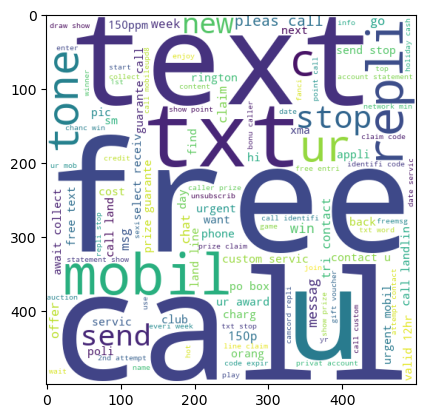

In [54]:
plt.imshow(spam_wc)

In [55]:
ham_wc=wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=" "))

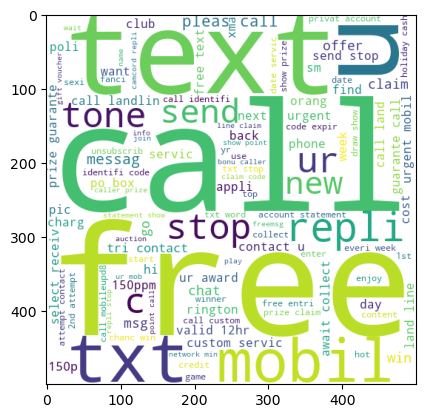

In [56]:
plt.imshow(ham_wc)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [59]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [60]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [61]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [62]:
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

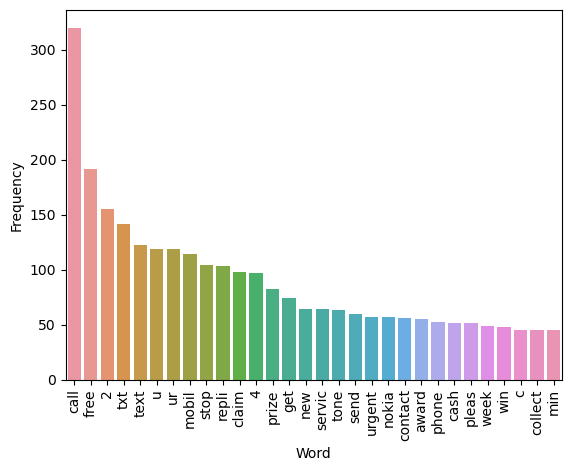

In [63]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list of data
spam_counter = Counter(spam_corpus)
spam_common = spam_counter.most_common(30)
spam_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])

# Use sns.barplot with x and y parameters
sns.barplot(x='Word', y='Frequency', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()


In [64]:
spam_common

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

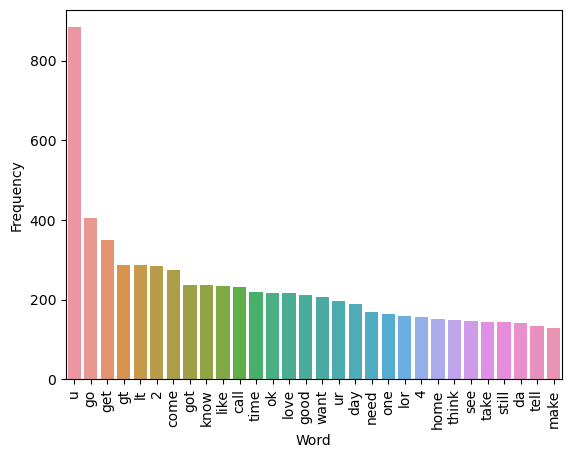

In [65]:
ham_counter = Counter(ham_corpus)
ham_common = ham_counter.most_common(30)
ham_df = pd.DataFrame(ham_common, columns=['Word', 'Frequency'])

# Use sns.barplot with x and y parameters
sns.barplot(x='Word', y='Frequency', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model building

In [66]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv= CountVectorizer()  # countvectorizer is a scikit learn library which is used to convert the string data into a numerical data. it will make a document term matrix.
tfidf= TfidfVectorizer(max_features = 3000)

In [67]:
x= cv.fit_transform(df['transformed_text']).toarray()

In [68]:
x.shape  # 6677 is the no. of words

(5169, 6677)

In [69]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
y = df['target'].values

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state=2)

In [73]:
from sklearn.naive_bayes import  GaussianNB ,MultinomialNB , BernoulliNB
# naive bayesIt is mainly used in text classification that includes a high-dimensional training dataset.
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score


In [74]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [75]:
gnb.fit(x_train , y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [76]:
mnb.fit(x_train , y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [77]:
bnb.fit(x_train , y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


2nd method with tfidf

In [78]:
x= tfidf.fit_transform(df['transformed_text']).toarray()

In [79]:
#from sklearn.preprocessing import MinMaxScaler
#scaler =  MinMaxScaler()
#x=scaler.fit_transform(x)

In [80]:
y = df['target'].values

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state=2)

In [83]:
from sklearn.naive_bayes import  GaussianNB ,MultinomialNB , BernoulliNB
# naive bayesIt is mainly used in text classification that includes a high-dimensional training dataset.
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score


In [84]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb=BernoulliNB()

In [85]:
mnb.fit(x_train , y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2)) # we select this

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [86]:
gnb.fit(x_train , y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [87]:
bnb.fit(x_train , y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [88]:
# tfidf --> mnb




In [89]:
#!pip install xgboost

In [90]:
from xgboost import XGBClassifier


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [92]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
#gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [93]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    #'BgC': bc, 
    #'ETC': etc,
    #'GBDT':gbdt,
    'xgb':xgb
}

In [94]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [95]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [96]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8469387755102041
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9411764705882353


In [97]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
4,LR,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
7,xgb,0.968085,0.941176
3,DT,0.932302,0.846939


In [98]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.956480
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.968085
7,DT,Accuracy,0.932302
8,KN,Precision,1.000000
9,NB,Precision,1.000000


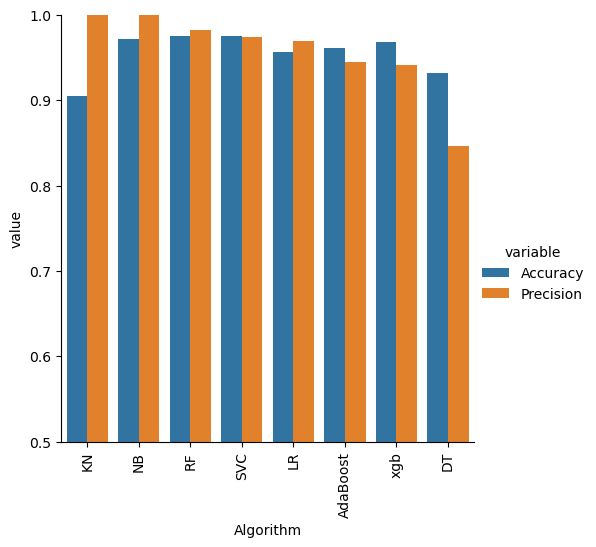

In [99]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [100]:
# model improve
# 1. Change the max_features parameter of TfIdf


In [101]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [102]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [103]:


new_df = performance_df.merge(temp_df,on='Algorithm')


In [104]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [105]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [106]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697
5,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
6,xgb,0.968085,0.941176,0.968085,0.941176,0.968085,0.941176,0.968085,0.941176
7,DT,0.932302,0.846939,0.932302,0.846939,0.932302,0.846939,0.932302,0.846939


In [107]:
# Voting Classifier  combination of best supporting algo , combination of two or more algo
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [108]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [109]:
#voting.fit(x_train,y_train)

In [110]:
#y_pred = voting.predict(x_test)
#print("Accuracy",accuracy_score(y_test,y_pred))
#print("Precision",precision_score(y_test,y_pred))

In [111]:
# Applying stacking similar to voting , weightage
#estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
#final_estimator=RandomForestClassifier()

In [112]:
#from sklearn.ensemble import StackingClassifier

In [113]:
#clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [114]:
#clf.fit(x_train,y_train)
#y_pred = clf.predict(x_test)
#print("Accuracy",accuracy_score(y_test,y_pred))
#print("Precision",precision_score(y_test,y_pred))


In [115]:
# we use our multinomial naive bayes

In [116]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


